<a href="https://colab.research.google.com/github/Arainal0112/PCVK_Ganjil_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Nama : Arainal Aldiansyah
- Kelas : TI - 3C
- Absen : 3

In [1]:
from google.colab import drive

#Akses google drive
drive.mount('/content/drive')

Mounted at /content/drive


## Praktikum 1

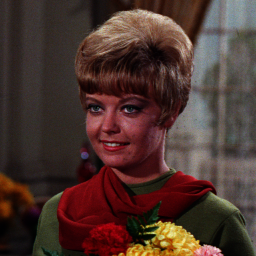

In [70]:
# Import
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
img = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/female.tiff')
cv2_imshow(img)

### 1. Buat Gamma Correction

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


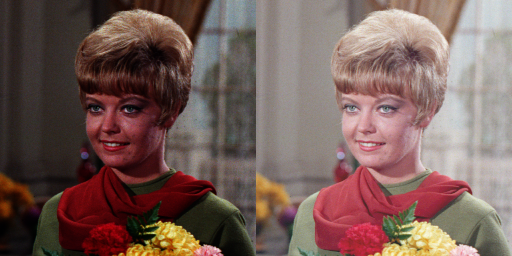

In [22]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

gamma_image = np.zeros(img.shape, img.dtype)

for x in range(img.shape[0]):
  for y in range(img.shape[1]):
    for z in range(img.shape[2]):
     gamma_image[x,y,z] = np.clip(255 * pow(img[x,y,z]/255,(1/gamma)), 0, 255)

final_frame = cv.hconcat((img, gamma_image))
cv2_imshow(final_frame)

2. Buat Depth

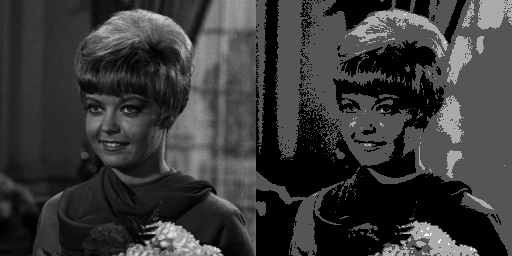

In [81]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/female.tiff', cv.IMREAD_GRAYSCALE)
original = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Convert BGR to RGB

bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

depth_image = np.zeros(original.shape, original.dtype)  # Initialize depth_image array

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            depth_image[y, x, c] = np.clip(round(original[y, x, c] / level) * level, 0, 255)


final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

3.

# Tugas

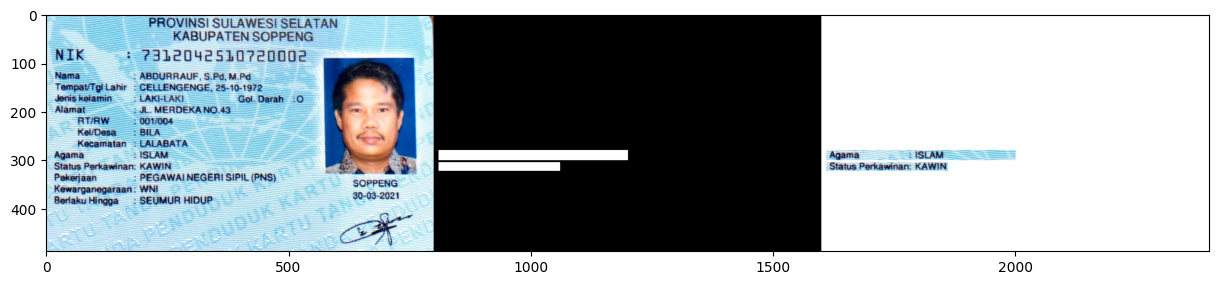

In [87]:
img_ktp = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/KTP.jpeg')
img_ktp2 = cv.cvtColor(img_ktp, cv.COLOR_BGR2RGB)

image_masking = np.zeros(img_ktp2.shape, dtype=np.uint8) # Mengambil ukuran dari img_ktp

masking1 = cv.rectangle(image_masking, pt1=(400,280), pt2=(10,300), color=(255,255,255), thickness=cv.FILLED)


masking2 = cv.rectangle(image_masking, pt1=(260,322), pt2=(10,305), color=(255,255,255), thickness=cv.FILLED)

#Operasi NOT pada img_ktp2 dengan membalikan nilai bit
original = ~ img_ktp2

#Operasi And
hasil_AND = ~ (image_masking & original)

final_frame = cv.hconcat((img_ktp2, image_masking, hasil_AND))
plt.figure(figsize=(15, 5)) # Mengatur ukuran tampilan
plt.imshow(final_frame)
plt.show()